In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [3]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [4]:
print(df.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  Unnamed: 9  ...  Unnamed: 16  Unnamed: 17  \
0    15.9129     79.74 

In [6]:
df = df.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])

In [7]:

print(df.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     

In [8]:
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [11]:
print(df.dtypes)

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
Longitude                                         float64
Latitude                                          float64
dtype: object


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
print(df.describe())

                                Date  Estimated Unemployment Rate (%)  \
count                            267                       267.000000   
mean   2020-06-16 09:15:30.337078528                        12.236929   
min              2020-01-31 00:00:00                         0.500000   
25%              2020-03-31 00:00:00                         4.845000   
50%              2020-06-30 00:00:00                         9.650000   
75%              2020-08-31 00:00:00                        16.755000   
max              2020-10-31 00:00:00                        75.850000   
std                              NaN                        10.803283   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        2.670000e+02                               267.000000   
mean         1.396211e+07                                41.681573   
min          1.175420e+05                                16.770000   
25%          2.838930e+06                                37.26

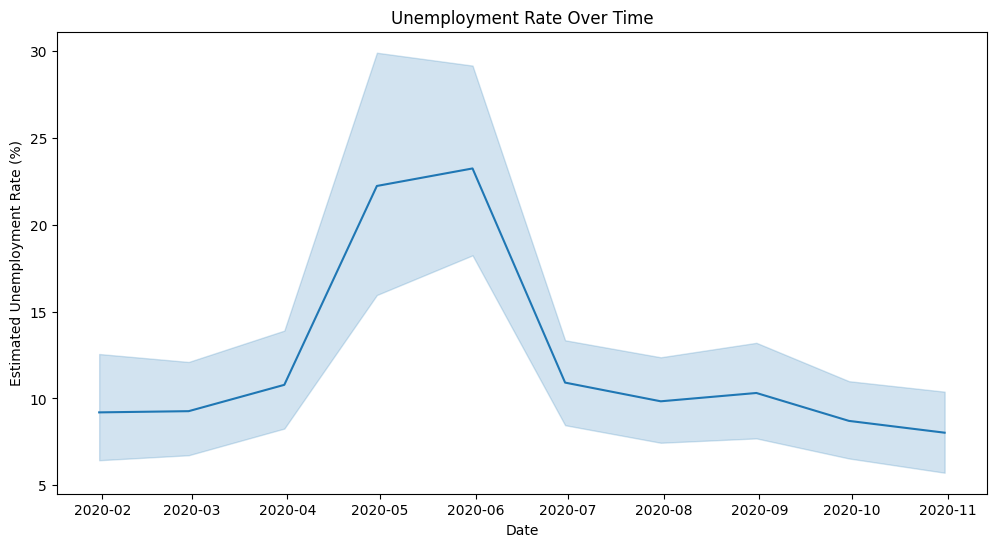

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()


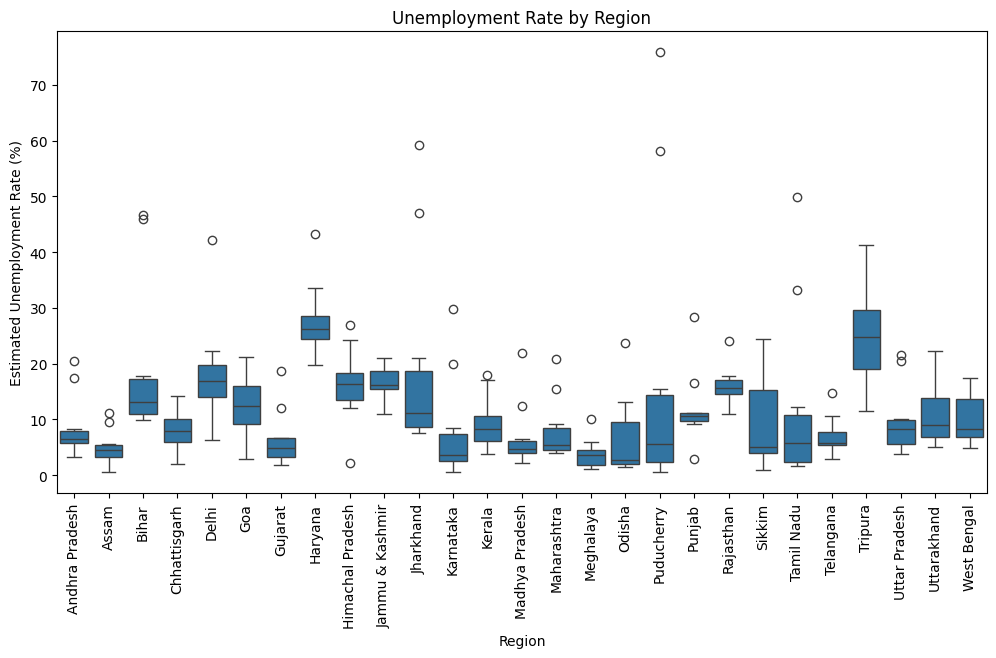

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df.set_index('Date', inplace=True)

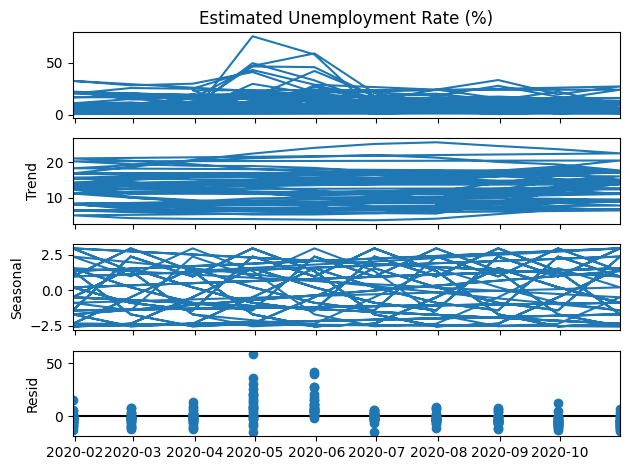

In [18]:
result = seasonal_decompose(df['Estimated Unemployment Rate (%)'], model='additive', period=12)
result.plot()
plt.show()

In [19]:
import plotly.express as px

In [20]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Region", hover_data=["Estimated Unemployment Rate (%)"],
                        color="Estimated Unemployment Rate (%)", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=3)


In [21]:
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
features = df.drop(['Estimated Unemployment Rate (%)'], axis=1).select_dtypes(include='number')
target = df['Estimated Unemployment Rate (%)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 36.63472810814818
